<a href="https://colab.research.google.com/github/esheshka/Cyberpunk-Neon/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pickle
import pickle 

from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import os

import scipy.ndimage
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [2]:
from matplotlib import test
def p(l1=25, par=20, t=2,  lim=[0.5], save=False):
    app = 10000000
    co = []
    gazprom = open('gazprom_file070422.txt', 'r')
    gp_pre = [float(float(i)*100) for i in gazprom.read().replace(',', '.').split()]

    gp_pre = gp_pre[::t]
    c = np.array([gp_pre[0:l1*par:par]])
    for i in range(par):
        gp_p = np.array(gp_pre)[i::par]
        l2 = gp_p.shape[0]
        for j in range(l2 - l1):
            c = np.append(c, [gp_p[j:l1+j]], axis=0)
            co.append('gazp')
    c = c[1:]

    for c_f in os.listdir("c_fs"):
        # print(c_f)
        if c_f == ".ipynb_checkpoints":
            continue
        with open(os.path.join("c_fs", c_f), 'r') as f:
            c_pre = [float(i) for i in f.read().split()[:-1]]
            c_pre = c_pre[::t]
            for i in range(par):
                c_p = np.array(c_pre)[i::par]
                l2 = c_p.shape[0]
                for j in range(l2 - l1):
                    c = np.append(c, [c_p[j:l1+j]], axis=0)
                    co.append(c_f[:4])



    c_post = np.array([(c[:, 0] - c[:, 1]) * app / c[:, 0]])
    for i in range(l1-2):
        c_post = np.append(c_post, [(c[:, i+1] - c[:, i+2]) * app / c[:, i+1]], axis=0)
    c_post = np.append(c_post[:-1], [(c[:, -2]*1.0004 - c[:, -1]*0.9996) * app / c[:, -2]*1.0004], axis=0)
    # c_post = np.append(c_post[:-1], [(c[:, -2] - c[:, -1]) * app / c[:, -2]], axis=0)


    # print(c_post.shape)
    # q = ((c[:, -2] - c[:, -1]) * app / c[:, -2]) != 0
    # c_post = c_post[:, q]

    c_f2 = c_post.T.astype('int')

    co = np.array([co])
    cot = co
    ohe = OneHotEncoder()
    co = ohe.fit_transform(co.T).toarray()

    c_f2 = np.append(co.astype('bool'), c_f2.astype('int'), axis=1)

    df = pd.DataFrame(c_f2)
    df[np.arange(df.shape[1])[4:]] = -1*df[np.arange(df.shape[1])[4:]]
    df[np.arange(df.shape[1])[:4]] = df[np.arange(df.shape[1])[:4]].astype('bool')


    change = df[df.columns[-1]].values

    labels = (change)
    labels_b = labels != 0
    labels = labels[labels_b] > 0


    feature_matrix = df[df.columns[:-1]].values
    feature_matrix = feature_matrix[labels_b, :]

    # gp[:, 0].shape



# 
    # lab = scipy.ndimage.zoom(labels[:200], 3)
    # plt.figure(figsize=(30, 10))
    # plt.plot(lab)
    # plt.show()


    test_size = int(feature_matrix[feature_matrix[:, 0] == 1].shape[0]*3/10)
    train_feature_matrix = feature_matrix[feature_matrix[:, 0] == 1][:-test_size]
    test_feature_matrix = feature_matrix[feature_matrix[:, 0] == 1][-test_size:]
    train_labels = labels[feature_matrix[:, 0] == 1][:-test_size]
    test_labels = labels[feature_matrix[:, 0] == 1][-test_size:]

    print(train_feature_matrix.shape)

    test_size = int(feature_matrix[feature_matrix[:, 1] == 1].shape[0]*3/10)
    train_feature_matrix = np.append(train_feature_matrix.astype('int'), feature_matrix[feature_matrix[:, 1] == 1][:-test_size].astype('int'), axis=0)
    test_feature_matrix = np.append(test_feature_matrix, feature_matrix[feature_matrix[:, 1] == 1][-test_size:].astype('int'), axis=0)
    train_labels = np.append(train_labels, labels[feature_matrix[:, 1] == 1][:-test_size].astype('bool'), axis=0)
    test_labels = np.append(test_labels, labels[feature_matrix[:, 1] == 1][-test_size:].astype('bool'), axis=0)

    print(train_feature_matrix.shape)

    test_size = int(feature_matrix[feature_matrix[:, 2] == 1].shape[0]*3/10)
    train_feature_matrix = np.append(train_feature_matrix, feature_matrix[feature_matrix[:, 2] == 1][:-test_size].astype('int'), axis=0)
    test_feature_matrix = np.append(test_feature_matrix, feature_matrix[feature_matrix[:, 2] == 1][-test_size:].astype('int'), axis=0)
    train_labels = np.append(train_labels, labels[feature_matrix[:, 2] == 1][:-test_size].astype('bool'), axis=0)
    test_labels = np.append(test_labels, labels[feature_matrix[:, 2] == 1][-test_size:].astype('bool'), axis=0)

    print(train_feature_matrix.shape)

    test_size = int(feature_matrix[feature_matrix[:, 3] == 1].shape[0]*3/10)
    train_feature_matrix = np.append(train_feature_matrix, feature_matrix[feature_matrix[:, 3] == 1][:-test_size].astype('int'), axis=0)
    test_feature_matrix = np.append(test_feature_matrix, feature_matrix[feature_matrix[:, 3] == 1][-test_size:].astype('int'), axis=0)
    train_labels = np.append(train_labels, labels[feature_matrix[:, 3] == 1][:-test_size].astype('bool'), axis=0)
    test_labels = np.append(test_labels, labels[feature_matrix[:, 3] == 1][-test_size:].astype('bool'), axis=0)

    print(train_feature_matrix.shape)




# 
    clf1 = RandomForestRegressor()
    clf1.fit(train_feature_matrix, train_labels)

    # clf2 = DecisionTreeClassifier()
    # params2 = {
    #     'criterion': ['gini', 'entropy'],
    #     'splitter': ['best', 'random'],
    #     'max_features': ['sqrt', 'log2'],
    #     # 'max_depth': np.arange(100, 110),

    # }
    # clf_grid = GridSearchCV(clf2, params2, cv=5, scoring='accuracy', n_jobs=-1)
    # clf_grid.fit(train_feature_matrix, train_labels)

    y_pred1 = clf1.predict(test_feature_matrix)
    # y_pred2 = clf_grid.predict(test_feature_matrix)

    plt.subplot()
    plt.hist(y_pred1*100, bins=100)
    plt.show()

    # y_pred1 = np.random.binomial(1, y_pred1)
    # y_pred1 = np.around(y_pred1)
    y_pred1_2 = y_pred1
    for limit in lim:
        print(limit)
        y_pred1 = y_pred1_2 > limit

        y_pred_bool1 = (y_pred1 > 0) == (test_feature_matrix[:, -1] > 0)
        test_labels_bool1 = (test_labels > 0) == (test_feature_matrix[:, -1] > 0)


        print(accuracy_score(test_labels[y_pred1 > 0] > 0, y_pred1[y_pred1 > 0] > 0), ' - положительная булевая точность')
        print(np.sum(y_pred1), ' - колличество предположительных \n', np.sum(test_labels), ' - колличество верных')
        print(y_pred1.shape[0], '\n')

        # ['alrs' 'gazp' 'rosn' 'rual']
        print(accuracy_score(test_labels[test_feature_matrix[:, 0] == 1][y_pred1[test_feature_matrix[:, 0] == 1] > 0] > 0, y_pred1[test_feature_matrix[:, 0] == 1][y_pred1[test_feature_matrix[:, 0] == 1] > 0] > 0), ' - положительная точность alrs')
        print(np.sum(y_pred1[test_feature_matrix[:, 0] == 1] > 0), ' - колличество предположительных gazp -', np.sum(test_labels[test_feature_matrix[:, 0] == 1] > 0)) 
        print(test_labels[test_feature_matrix[:, 0] == 1].shape[0], '\n')
        print(accuracy_score(test_labels[test_feature_matrix[:, 1] == 1][y_pred1[test_feature_matrix[:, 1] == 1] > 0] > 0, y_pred1[test_feature_matrix[:, 1] == 1][y_pred1[test_feature_matrix[:, 1] == 1] > 0] > 0), ' - положительная точность gazp')
        print(np.sum(y_pred1[test_feature_matrix[:, 1] == 1] > 0), ' - колличество предположительных rosn -', np.sum(test_labels[test_feature_matrix[:, 1] == 1] > 0)) 
        print(test_labels[test_feature_matrix[:, 1] == 1].shape[0], '\n')
        print(accuracy_score(test_labels[test_feature_matrix[:, 2] == 1][y_pred1[test_feature_matrix[:, 2] == 1] > 0] > 0, y_pred1[test_feature_matrix[:, 2] == 1][y_pred1[test_feature_matrix[:, 2] == 1] > 0] > 0), ' - положительная точность rosn')
        print(np.sum(y_pred1[test_feature_matrix[:, 2] == 1] > 0), ' - колличество предположительных rual -', np.sum(test_labels[test_feature_matrix[:, 2] == 1] > 0)) 
        print(test_labels[test_feature_matrix[:, 2] == 1].shape[0], '\n')
        print(accuracy_score(test_labels[test_feature_matrix[:, 3] == 1][y_pred1[test_feature_matrix[:, 3] == 1] > 0] > 0, y_pred1[test_feature_matrix[:, 3] == 1][y_pred1[test_feature_matrix[:, 3] == 1] > 0] > 0), ' - положительная точность rual')
        print(np.sum(y_pred1[test_feature_matrix[:, 3] == 1] > 0), ' - колличество предположительных rual -', np.sum(test_labels[test_feature_matrix[:, 3] == 1] > 0)) 
        print(test_labels[test_feature_matrix[:, 3] == 1].shape[0], '\n')

        # print(accuracy_score(test_labels_bool1, y_pred_bool1), ' - булевая точность')
        print(accuracy_score(test_labels, y_pred1), ' - абсолютная точность\n')
        print('\n\n\n\n')




        alpha = 2000
        # Ответы с точностью до alpha
        # ep = np.append([test_labels[(y_pred1 > test_labels - alpha) * (y_pred1 < test_labels + alpha)]], [y_pred1[(y_pred1 > test_labels - alpha) * (y_pred1 < test_labels + alpha)]], axis=0)
        # print(ep.shape[1] / test_labels.shape[0], ' - точность до alpha')
        # print('')
        # print(ep.T, ' - верные сточностью до alpha')
        # print('')
        # print(np.append([test_labels[y_pred1 > 0]], [y_pred1[y_pred1 > 0]], axis=0).T, ' - положительно верные')
        # print('')

    if save:
        pred_30s_v2_pkl = "pred_10m_v3.pkl" 
        with open(pred_30s_v2_pkl, 'wb') as file: 
            pickle.dump(clf1, file) 

    # y_pred_bool2 = (y_pred2 > 0) == (test_feature_matrix[:, -1] > 0)
    # test_labels_bool2 = (test_labels > 0) == (test_feature_matrix[:, -1] > 0)


    # print(accuracy_score(test_labels[y_pred2 > 0] > 0, y_pred2[y_pred2 > 0] > 0), ' - положительная булевая точность')
    # print(np.sum(y_pred2), ' - колличество предположительных \n', np.sum(test_labels), ' - колличество верных')
    # print(y_pred2.shape[0], '\n')

    # # ['alrs' 'gazp' 'rosn' 'rual']
    # print(accuracy_score(test_labels[test_feature_matrix[:, 0] == 1][y_pred2[test_feature_matrix[:, 0] == 1] > 0] > 0, y_pred2[test_feature_matrix[:, 0] == 1][y_pred2[test_feature_matrix[:, 0] == 1] > 0] > 0), ' - положительная точность alrs')
    # print(np.sum(y_pred1[test_feature_matrix[:, 0] == 1] > 0), ' - колличество предположительных gazp -', np.sum(test_labels[test_feature_matrix[:, 0] == 1] > 0)) 
    # print(test_labels[test_feature_matrix[:, 0] == 1].shape[0], '\n')
    # print(accuracy_score(test_labels[test_feature_matrix[:, 1] == 1][y_pred2[test_feature_matrix[:, 1] == 1] > 0] > 0, y_pred2[test_feature_matrix[:, 1] == 1][y_pred2[test_feature_matrix[:, 1] == 1] > 0] > 0), ' - положительная точность gazp')
    # print(np.sum(y_pred1[test_feature_matrix[:, 1] == 1] > 0), ' - колличество предположительных rosn -', np.sum(test_labels[test_feature_matrix[:, 1] == 1] > 0)) 
    # print(test_labels[test_feature_matrix[:, 1] == 1].shape[0], '\n')
    # print(accuracy_score(test_labels[test_feature_matrix[:, 2] == 1][y_pred2[test_feature_matrix[:, 2] == 1] > 0] > 0, y_pred2[test_feature_matrix[:, 2] == 1][y_pred2[test_feature_matrix[:, 2] == 1] > 0] > 0), ' - положительная точность rosn')
    # print(np.sum(y_pred1[test_feature_matrix[:, 2] == 1] > 0), ' - колличество предположительных rual -', np.sum(test_labels[test_feature_matrix[:, 2] == 1] > 0)) 
    # print(test_labels[test_feature_matrix[:, 2] == 1].shape[0], '\n')
    # print(accuracy_score(test_labels[test_feature_matrix[:, 3] == 1][y_pred2[test_feature_matrix[:, 3] == 1] > 0] > 0, y_pred2[test_feature_matrix[:, 3] == 1][y_pred2[test_feature_matrix[:, 3] == 1] > 0] > 0), ' - положительная точность rual')
    # print(np.sum(y_pred1[test_feature_matrix[:, 3] == 1] > 0), ' - колличество предположительных rual -', np.sum(test_labels[test_feature_matrix[:, 3] == 1] > 0)) 
    # print(test_labels[test_feature_matrix[:, 3] == 1].shape[0], '\n')

    # # print(accuracy_score(test_labels_bool1, y_pred_bool1), ' - булевая точность')
    # print(accuracy_score(test_labels, y_pred2), ' - абсолютная точность\n')
    # print('\n\n\n\n')




    # alpha = 2000
    # # Ответы с точностью до alpha
    # # ep = np.append([test_labels[(y_pred1 > test_labels - alpha) * (y_pred1 < test_labels + alpha)]], [y_pred1[(y_pred1 > test_labels - alpha) * (y_pred1 < test_labels + alpha)]], axis=0)
    # # print(ep.shape[1] / test_labels.shape[0], ' - точность до alpha')
    # # print('')
    # # print(ep.T, ' - верные сточностью до alpha')
    # # print('')
    # # print(np.append([test_labels[y_pred1 > 0]], [y_pred1[y_pred1 > 0]], axis=0).T, ' - положительно верные')
    # # print('')


    # pred_30s_v2_pkl = "pred2_10m_v3.pkl" 
    # with open(pred_30s_v2_pkl, 'wb') as file: 
    #     pickle.dump(clf2, file) 

(2775, 27)
(5945, 27)
(8721, 27)
(11497, 27)


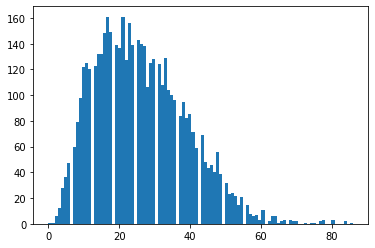

0.4
0.3876967095851216  - положительная булевая точность
699  - колличество предположительных 
 1096  - колличество верных
4925 

0.4936708860759494  - положительная точность alrs
79  - колличество предположительных gazp - 192
1189 

0.37037037037037035  - положительная точность gazp
324  - колличество предположительных rosn - 410
1358 

0.40512820512820513  - положительная точность rosn
195  - колличество предположительных rual - 272
1189 

0.32673267326732675  - положительная точность rual
101  - колличество предположительных rual - 222
1189 

0.7455837563451777  - абсолютная точность






0.5
0.46938775510204084  - положительная булевая точность
196  - колличество предположительных 
 1096  - колличество верных
4925 

0.5625  - положительная точность alrs
16  - колличество предположительных gazp - 192
1189 

0.3707865168539326  - положительная точность gazp
89  - колличество предположительных rosn - 410
1358 

0.5507246376811594  - положительная точность rosn
69  - колличество предп

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
p(25, 5, 2, [0.4, 0.5, 0.6, 0.7], 1) # l1=25, par=20

In [ ]:
w = np.array([1, 2, 3, 4, 5, 6])
e = np.array([False, True, False, True, False])
w[e]

IndexError: ignored